## Algebra: Composite-Hamiltonian and Time Evolution

1. https://numpy.org/doc/stable/reference/routines.linalg.html
2. http://qutip.org/docs/latest/guide/dynamics/dynamics-master.html

In [27]:
import numpy as np
from qutip import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

Given a Hamiltonian, we can calculate the unitary (non-dissipative) time-evolution of an arbitrary state vector |ψ0⟩ (psi0) using the QuTiP function ```qutip.sesolve```. It evolves the state vector and evaluates the expectation values for a set of operators expt_ops at the points in time in the list times, using an ordinary differential equation solver. 

Scrodinger Equation: $$i\hbar\frac{d}{dt}\left|\psi\right> = H \left|\psi\right>$$

Time evolution: <img src="https://miro.medium.com/max/1016/1*bupc_zDBvvA0jWG0GTejng@2x.png" width=200 height=200> </img>

### A . Single qubit System

- 1. Consider a single qubit hamiltonian constructed by implementing pauli x operator: 
$$H = 2 \pi \sigma_x$$

In [175]:
# single qubit hamiltonian
H =  2.0*np.pi * sigmax()
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         6.28318531]
 [6.28318531 0.        ]]

- 2. Create  the initial state of the system

In [176]:
#initial state of the single qubit system
#psi0 = basis(2,0)
psi0 = basis(2,1)
#psi0 = (1/np.sqrt(2))*basis(2,0)+ (1/np.sqrt(2))*basis(2,1)
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

- 3. Create time array to conduct measurement time points during the evolution

In [177]:
times = np.linspace(0.0, 10.0, 20)
times

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

- 4. Simulate the time evolution by implementing ```sesolve``` function by supplying hamiltonian ```H```, initial state ```psi0```, time array ```times``` and list of operators ```[sigmaz(), sigmay()]``` representing what you want to measure as expectation value of.

In [178]:
result = sesolve(H, psi0, times, [sigmaz(), sigmay()])

- 5. Explore the result

In [179]:
result

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 2, num_collapse = 0

- 6. Where are the expectation value of the implemented operator for measurement during time evolution?

In [180]:
result.expect

[array([-1.        , -0.94581561, -0.78913418, -0.54693623, -0.24546751,
         0.08260204,  0.40171988,  0.67730341,  0.87948895,  0.9863673 ,
         0.98635446,  0.87945165,  0.67724451,  0.4016443 ,  0.08252413,
        -0.24554292, -0.54700067, -0.78917951, -0.94583863, -1.        ]),
 array([ 0.00000000e+00,  3.24704211e-01,  6.14220851e-01,  8.37174272e-01,
         9.69404818e-01,  9.96582612e-01,  9.15762600e-01,  7.35703806e-01,
         4.75919309e-01,  1.64558631e-01, -1.64635573e-01, -4.75988221e-01,
        -7.35758027e-01, -9.15795752e-01, -9.96589067e-01, -9.69385719e-01,
        -8.37132169e-01, -6.14162600e-01, -3.24637165e-01,  7.13395936e-05])]

- 7 Plot the time evolution of the expection values of the implemented operators

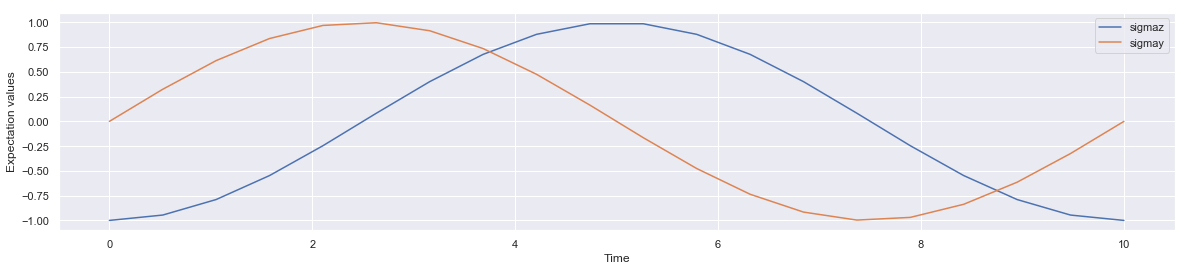

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize = [20,4])
plt.plot(result.times, result.expect[0])
plt.plot(result.times, result.expect[1])
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("sigmaz", "sigmay"))
plt.show()

Lets repeat the same steps for multi-qubit system. Before that, we need to construct the composite hamiltonian representing the quantum mechanical system.

### B. Constructing composite Hamiltonians

#### 1. Two coupled qubits

Consider a Hamiltonial of a 2 qubits system representated by composite hamiltonian shwn below. The first term represents the contribution of second qubit Z spin operator (sigmaz()) while first qubit remains inactive(identity); the second term represents the contribution of first qubit spin operator while second qubit remains inactive(identity); the third represents the contribution of first and second qubit X spin operator.

$H = 0.2(\sigma_z \otimes I) + 0.4(I \otimes \sigma_z) + \frac{1}{4} (\sigma_x \otimes \sigma_x)$

In [184]:
H2 = 0.2*np.pi*tensor(sigmaz(), identity(2)) \
    + 0.4*np.pi*tensor(identity(2),sigmaz()) \
    + 0.25 *np.pi*tensor(sigmax(), sigmax())

In [185]:
H2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.88495559  0.          0.          0.78539816]
 [ 0.         -0.62831853  0.78539816  0.        ]
 [ 0.          0.78539816  0.62831853  0.        ]
 [ 0.78539816  0.          0.         -1.88495559]]

#### 2. Three Coupled Qubit

Consider a Hamiltonial of a 3 qubits system representated by composite hamiltonian shwn below. The first term represents the contribution of third qubit Z spin operator (sigmaz()) while rest of the qubits remains inactive(identity); the second term represents the contribution of second qubit spin operator while remaining qubits inactive and so on.

$H = (\sigma_z \otimes I \otimes I) + (I \otimes \sigma_z \otimes I) + (I  \otimes I  \otimes \sigma_z ) +  1/2 (\sigma_x \otimes \sigma_x \otimes I) +  1/4 (  I  \otimes \sigma_x \otimes \sigma_x)$

In [186]:
H3 = (tensor(sigmaz(), identity(2), identity(2)) +
     tensor(identity(2), sigmaz(), identity(2)) +
    tensor(identity(2), identity(2), sigmaz()) +
     0.5 * tensor(sigmax(), sigmax(), identity(2)) +
     0.25 * tensor(identity(2), sigmax(), sigmax())) 

In [187]:
H3

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 3.    0.    0.    0.25  0.    0.    0.5   0.  ]
 [ 0.    1.    0.25  0.    0.    0.    0.    0.5 ]
 [ 0.    0.25  1.    0.    0.5   0.    0.    0.  ]
 [ 0.25  0.    0.   -1.    0.    0.5   0.    0.  ]
 [ 0.    0.    0.5   0.    1.    0.    0.    0.25]
 [ 0.    0.    0.    0.5   0.   -1.    0.25  0.  ]
 [ 0.5   0.    0.    0.    0.    0.25 -1.    0.  ]
 [ 0.    0.5   0.    0.    0.25  0.    0.   -3.  ]]

### C. Time Evolution with composite Hamiltonian

#### How to generate a initial state vector?

This is 2 qubit quantum mechanical system, there are 4 basis states $|00 \rangle, |01 \rangle, |10 \rangle, |11 \rangle$ in 4 dimentional complex vector space. All operators in 2 qubit system should be 4 by 4 matrices while state vector need to be 4 element column ket(bra) vector.

In [188]:
psi0 = basis(4, 0)
psi0

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

**Q: Could we start with random ket vector?**
- Answer: yes!

In [189]:
# Example 1
psi1 = basis(4, 1)
psi1

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [190]:
# Example 2
psi2 = (1/2)*basis(4, 0) + (1/2)*basis(4,1)  + (1/2)*basis(4,2) + (1/2)*basis(4,3) 
psi2

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.5]
 [0.5]
 [0.5]
 [0.5]]

Lets perform the time evolution with two new operators for measurement (```m1-operator, m2-operator``` defined below in code block) of size 4 by 4 (why? remember, measurement operator in 2 qubit system also need to be 4 by 4 matrices).

In [203]:
# time array
times = np.linspace(0.0, 10.0, 100)

# measurement operator
m1_operator = tensor(identity(2), sigmaz())
m2_operator = tensor(sigmax(), sigmay())

# time evolution of state psi2 with hamiltonian H2 to calculate expectation 
# value of m-operator and m-2 operator at 100 different time points
result = sesolve(H2, psi2, times, [m1_operator,m2_operator])

In [204]:
# array holding multiple subarray of results
result

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 2, num_collapse = 0

In [205]:
# expectation value of m1 and m2 operator at 20 different time point
result.expect

[array([0.        , 0.01990965, 0.07693353, 0.16338415, 0.26780409,
        0.37676296, 0.47694252, 0.55716702, 0.6100466 , 0.63296734,
        0.62827241, 0.60261422, 0.56559699, 0.52794726, 0.49952837,
        0.48753968, 0.49520857, 0.52119896, 0.55983745, 0.60211928,
        0.63732295, 0.65495828, 0.64671514, 0.60807788, 0.5393257 ,
        0.44574105, 0.33698063, 0.22570382, 0.12567867, 0.04967351,
        0.00747984, 0.00439134, 0.04038908, 0.11016689, 0.20399138,
        0.30925384, 0.41245688, 0.50130765, 0.56657378, 0.60339885,
        0.61186652, 0.5967288 , 0.56635478, 0.53108657, 0.50128824,
        0.48542398, 0.48849536, 0.51110591, 0.54931383, 0.59529942,
        0.6387351 , 0.66862566, 0.6753056 , 0.65225216, 0.59740204,
        0.51374158, 0.40906153, 0.29490684, 0.1848873 , 0.09262206,
        0.0296538 , 0.00367407, 0.01735098, 0.06795116, 0.14781638,
        0.24561427, 0.34815462, 0.44247004, 0.51781734, 0.56727093,
        0.58864968, 0.5846312 , 0.56204482, 0.53

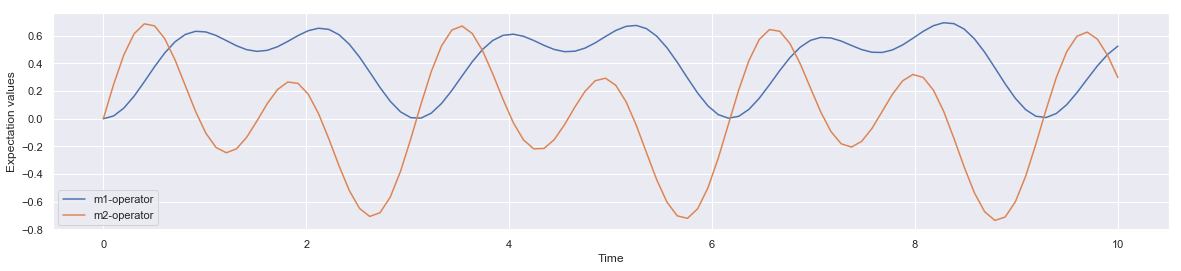

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize = [20,4])
plt.plot(result.times, result.expect[0])
plt.plot(result.times, result.expect[1])
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("m1-operator", "m2-operator"))
plt.show()

### References
1. [Pauli basis for any 2 by 2 matrices](https://physics.stackexchange.com/questions/292102/how-do-one-show-that-the-pauli-matrices-together-with-the-unit-matrix-form-a-bas)